## Making necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("placements.csv")
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df['salary'] = df['salary'].fillna(0)
df = df.drop('sl_no', axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            215 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.shape

(215, 14)

In [7]:
print(df['degree_t'].unique())
print(df['specialisation'].unique())
print(df['ssc_b'].unique())
print(df['hsc_b'].unique())

['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']
['Others' 'Central']
['Others' 'Central']


## Data Analysis
1. Understanding the Statistics of the dataset
2. Using different types of plots, graphs for data visualization

In [8]:
# Getting statistics for non-categorical data
df.describe().transpose()

count           mean            std    min     25%       50%  \
ssc_p     215.0      67.303395      10.827205  40.89  60.600      67.0   
hsc_p     215.0      66.333163      10.897509  37.00  60.900      65.0   
degree_p  215.0      66.370186       7.358743  50.00  61.000      66.0   
etest_p   215.0      72.100558      13.275956  50.00  60.000      71.0   
mba_p     215.0      62.278186       5.833385  51.21  57.945      62.0   
salary    215.0  198702.325581  154780.926716   0.00   0.000  240000.0   

                 75%        max  
ssc_p         75.700      89.40  
hsc_p         73.000      97.70  
degree_p      72.000      91.00  
etest_p       83.500      98.00  
mba_p         66.255      77.89  
salary    282500.000  940000.00

In [9]:
# Getting statistics for categorical data
df.describe(include = ['O']).transpose()

count unique        top freq
gender           215      2          M  139
ssc_b            215      2    Central  116
hsc_b            215      2     Others  131
hsc_s            215      3   Commerce  113
degree_t         215      3  Comm&Mgmt  145
workex           215      2         No  141
specialisation   215      2    Mkt&Fin  120
status           215      2     Placed  148

In [10]:
# Finding the correlation of different features with Status
df_corr = df.copy()
df_copy = df.copy()

label_dict = {'Placed':1, 'Not Placed':0}
df_corr['status'] = df_corr['status'].map(label_dict)
df_corr.corr()['status'].sort_values()

mba_p       0.076922
etest_p     0.127639
degree_p    0.479861
hsc_p       0.491228
ssc_p       0.607889
salary      0.865774
status      1.000000
Name: status, dtype: float64

#### Boxplot
1.The interquartile range for placed students is between 60% to 80% in ssc              
2.The interquartile range for non-placed students is between 50% to 65% in ssc

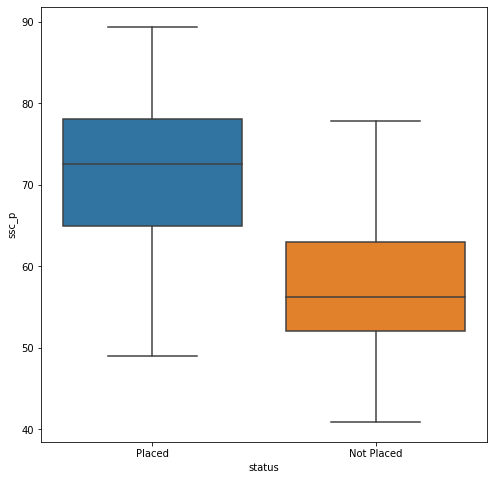

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(x='status',y='ssc_p',data=df)

1.The interquartile range for placed students is between 60% to 80% in hsc                                          
2.The interquartile range for non-placed students is between 50% to 65% in hsc

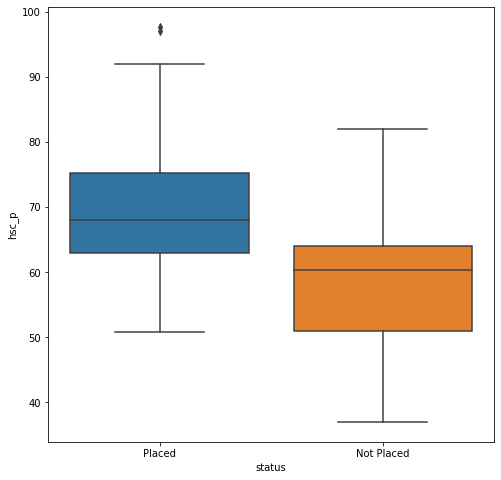

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(x='status',y='hsc_p',data=df)

1.The interquartile range for placed students is between 65% to 75% in degree                                        
2.The interquartile range for non-placed students is between 50% to 65% in degree

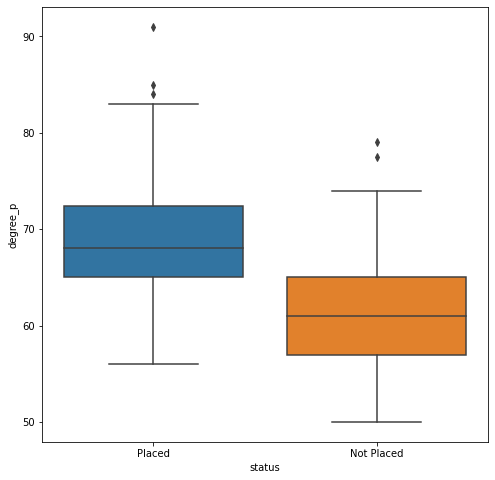

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(x='status',y='degree_p',data=df)

1.The interquartile range for placed students is between 60% to 85% in etest                                    
2.The interquartile range for non-placed students is between 60% to 75% in etest

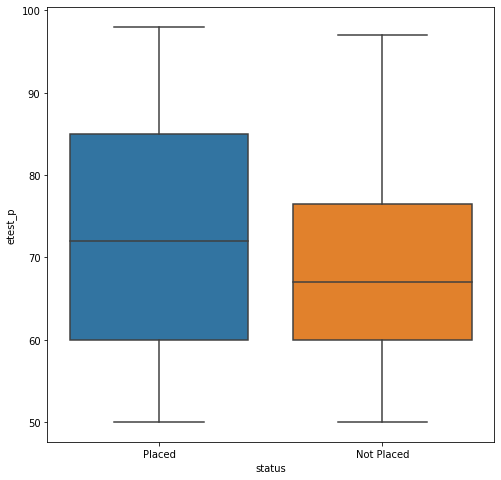

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(x='status',y='etest_p',data=df)

1.The interquartile range for placed students is between 55% to 70% in mba                                     
2.The interquartile range for non-placed students is between 55% to 65% in mba

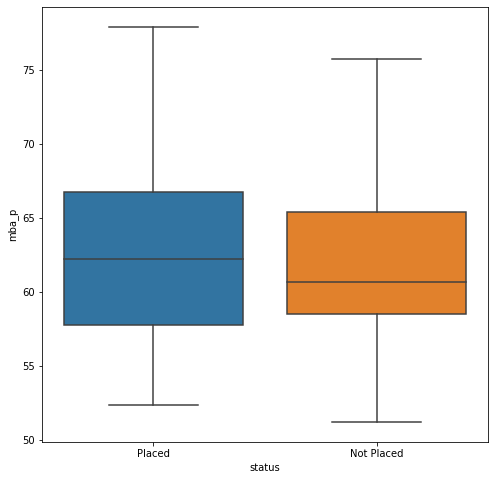

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(x='status',y='mba_p',data=df)

Count of males placed = 100      
Count of females placed = 48

In [16]:
df_gender_placed = df[df['status'] == 'Placed']
df_gender_placed[["gender", "status"]].groupby(['gender'], as_index=False).count()

gender  status
0      F      48
1      M     100

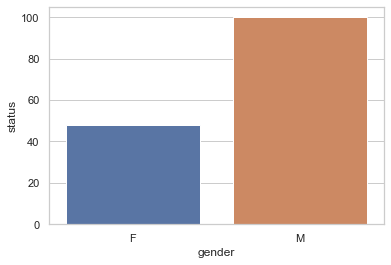

In [17]:
# Plot for placed males and females
sns.set(style="whitegrid")
sns.barplot(x = "gender", y = "status", data = df_gender_placed[["gender", "status"]].groupby(['gender'], as_index=False).count())

Number of students who studied ssc in Central board and placed are 78.              
Number of students who studied ssc in other board and placed are 70.                   

In [18]:
df_gender_placed[["ssc_b", "status"]].groupby(['ssc_b'], as_index=False).count()

ssc_b  status
0  Central      78
1   Others      70

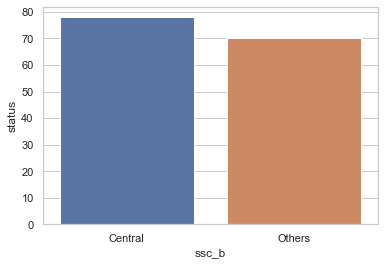

In [19]:
sns.set(style="whitegrid")
sns.barplot(x = "ssc_b", y = "status", data = df_gender_placed[["ssc_b", "status"]].groupby(['ssc_b'], as_index=False).count())

Number of students who studied hsc in Central board and placed are 57.                                        
Number of students who studied hsc in other board and placed are 91.

In [20]:
df_gender_placed[["hsc_b", "status"]].groupby(['hsc_b'], as_index=False).count()

hsc_b  status
0  Central      57
1   Others      91

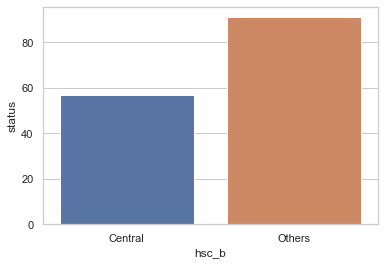

In [21]:
sns.set(style="whitegrid")
sns.barplot(x = "hsc_b", y = "status", data = df_gender_placed[["hsc_b", "status"]].groupby(['hsc_b'], as_index=False).count())

Number of students who studied Arts in hsc and placed are 6.                            
Number of students who studied Commerce in hsc and placed are 79.                                        
Number of students who studied Science in hsc and placed are 63.

In [22]:
df_gender_placed[["hsc_s", "status"]].groupby(['hsc_s'], as_index=False).count()

hsc_s  status
0      Arts       6
1  Commerce      79
2   Science      63

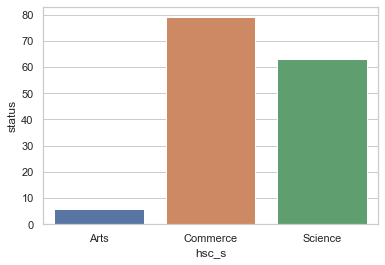

In [23]:
sns.set(style="whitegrid")
sns.barplot(x = "hsc_s", y = "status", data = df_gender_placed[["hsc_s", "status"]].groupby(['hsc_s'], as_index=False).count())

Number of students who studied Commerce and Management for degree and placed are 102.                    
Number of students who studied other stream for degree and placed are 5.                    
Number of students who studied Science and Technology for degree and placed are 41.

In [24]:
df_gender_placed[["degree_t", "status"]].groupby(['degree_t'], as_index=False).count()

degree_t  status
0  Comm&Mgmt     102
1     Others       5
2   Sci&Tech      41

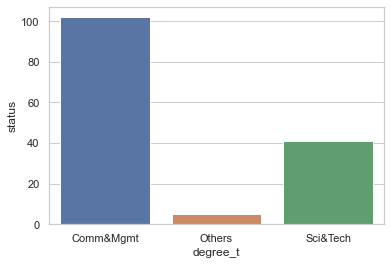

In [25]:
sns.set(style="whitegrid")
sns.barplot(x = "degree_t", y = "status", data = df_gender_placed[["degree_t", "status"]].groupby(['degree_t'], as_index=False).count())

Number of Students who had work experience and placed are 64.                                                        
Number of Students who had no work experience and placed are 84

In [26]:
df_gender_placed[["workex", "status"]].groupby(['workex'], as_index=False).count()

workex  status
0     No      84
1    Yes      64

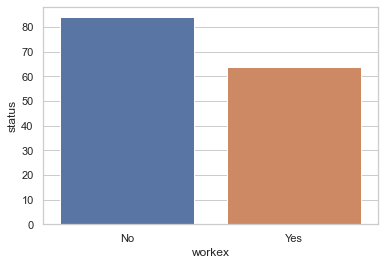

In [27]:
sns.set(style="whitegrid")
sns.barplot(x = "workex", y = "status", data = df_gender_placed[["workex", "status"]].groupby(['workex'], as_index=False).count())

Number of students specialised in Marketing & Finance and placed are 95.                                      
Number of students specialised in Marketing & HR and placed are 53

In [28]:
df_gender_placed[["specialisation", "status"]].groupby(['specialisation'], as_index=False).count()

specialisation  status
0        Mkt&Fin      95
1         Mkt&HR      53

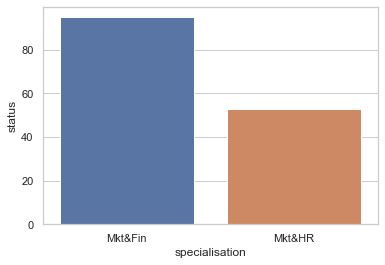

In [29]:
sns.set(style="whitegrid")
sns.barplot(x = "specialisation", y = "status", data = df_gender_placed[["specialisation", "status"]].groupby(['specialisation'], as_index=False).count())

In [30]:
label_dict = {'Placed' : 1, 'Not Placed': 0}
df_copy['status'] = df_copy['status'].map(label_dict)

In [31]:
df_copy['status'] 

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

#### Heatmap
Heatmap for correlation between different features.     

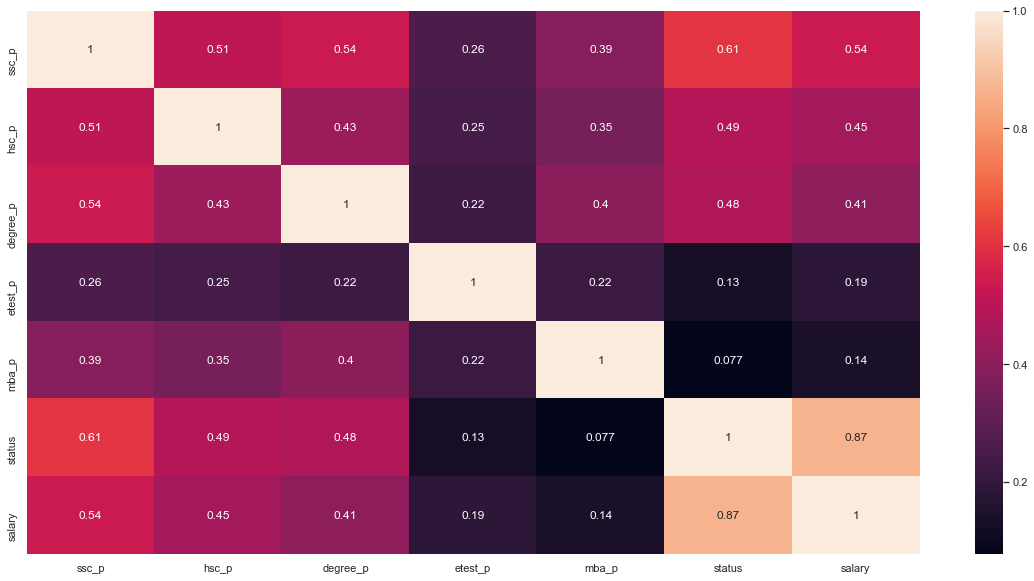

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True)

#### Scatter plot
Scatter plot for degree percent vs status with gender into consideration. 

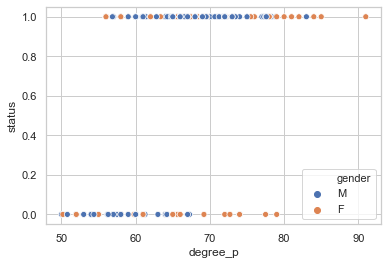

In [33]:
sns.scatterplot(x = 'degree_p', y = 'status', data = df_copy, hue = 'gender')

Scatter plot for ssc percent vs status with gender into consideration.

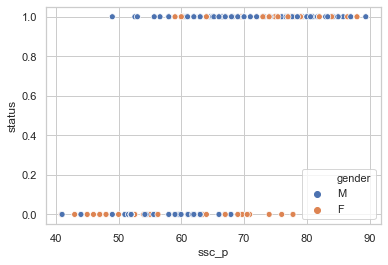

In [34]:
sns.scatterplot(x = 'ssc_p', y = 'status', data = df_copy, hue = 'gender')

Scatter plot for hsc percent vs status with gender into consideration.

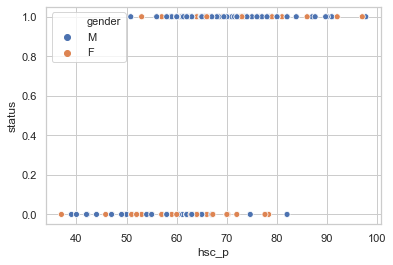

In [35]:
sns.scatterplot(x = 'hsc_p', y = 'status', data = df_copy, hue = 'gender')

Scatter plot for etest percent vs status with gender into consideration.

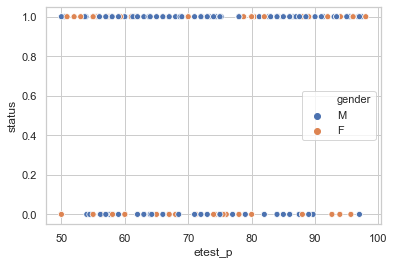

In [36]:
sns.scatterplot(x = 'etest_p', y = 'status', data = df_copy, hue = 'gender')

Scatter plot for MBA percent vs status with gender into consideration.

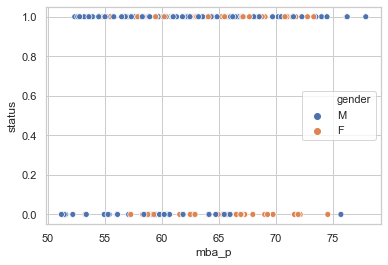

In [37]:
sns.scatterplot(x = 'mba_p', y = 'status', data = df_copy, hue = 'gender')

#### Ternary Scatter plot
Plot for showing the concerntration of Placed/Non-placed students taking into consideration the ssc, hsc, and degree percentages

In [38]:
fig = px.scatter_ternary(df, a="ssc_p", b="hsc_p",c="degree_p",color = "status")
fig.show()

#### Bar plot
The mean salary of placed male students is 215k.                                
The mean salary of placed female students is 168k.

In [39]:
grs = df.groupby(["gender"])[["salary"]].mean().reset_index()
fig = px.bar(grs[['gender', 'salary']].sort_values('salary', ascending=False), 
             y="salary", x="gender", color='gender', 
             log_y=True, template='ggplot2')
fig.show()

The mean salary of female specialised in Marketing & Finance and placed is 211.35k.        
The mean salary of female specialised in Marketing & HR and placed is 128.46k.              
  
The mean salary of male specialised in Marketing & Finance and placed is 247.84k.                      
The mean salary of male specialised in Marketing & HR and placed is 166.42k.                  

In [40]:
grgs = df.groupby(["gender","specialisation"])[["salary"]].mean().reset_index()
fig = px.bar(grgs, x="gender", y="salary", color='specialisation', barmode='group',
             height=400)
fig.show()

#### Histogram
Histogram of 'count of salary' vs 'degree percentage' taking into consideration the gender of student.

In [41]:
fig = px.histogram(df, x = "degree_p", y = "salary", color = "gender")
fig.show()

#### Relational plots

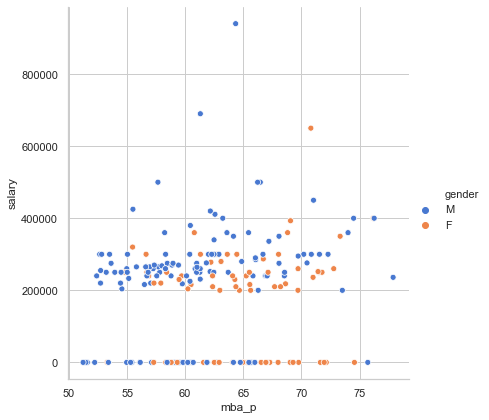

In [42]:
sns.relplot(x = "mba_p", y = "salary", hue = "gender", palette = "muted",
            height=6, data = df)

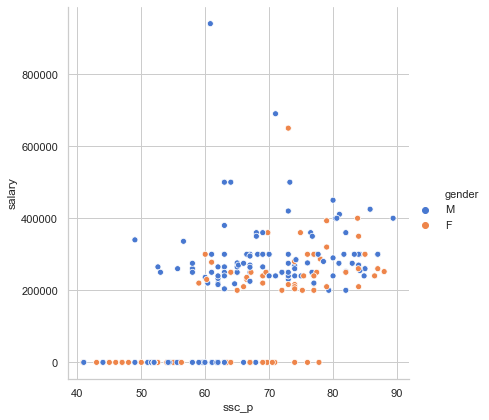

In [43]:
sns.relplot(x="ssc_p", y="salary", hue="gender", palette="muted",
            height=6, data = df)

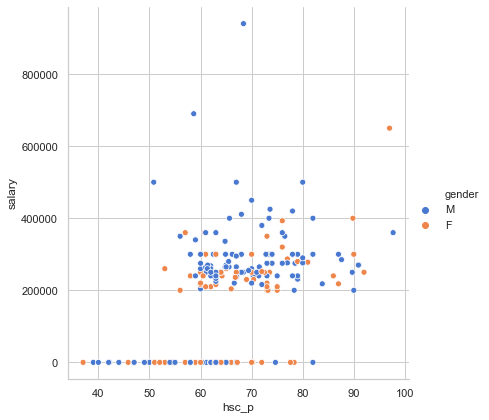

In [44]:
sns.relplot(x="hsc_p", y="salary", hue="gender", palette="muted",
            height=6, data = df)

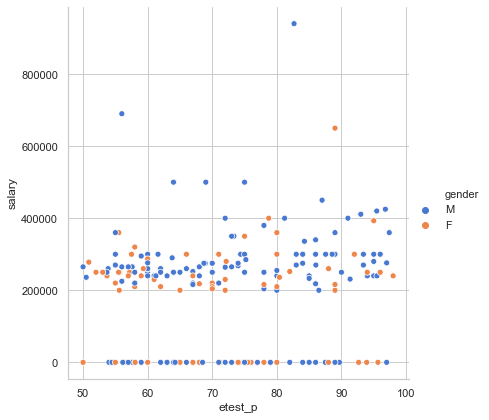

In [45]:
sns.relplot(x="etest_p", y="salary", hue="gender", palette="muted",
            height=6, data = df)

#### Pair plot
A pairs plot allows us to see both distribution of single variables and relationships between two variables.

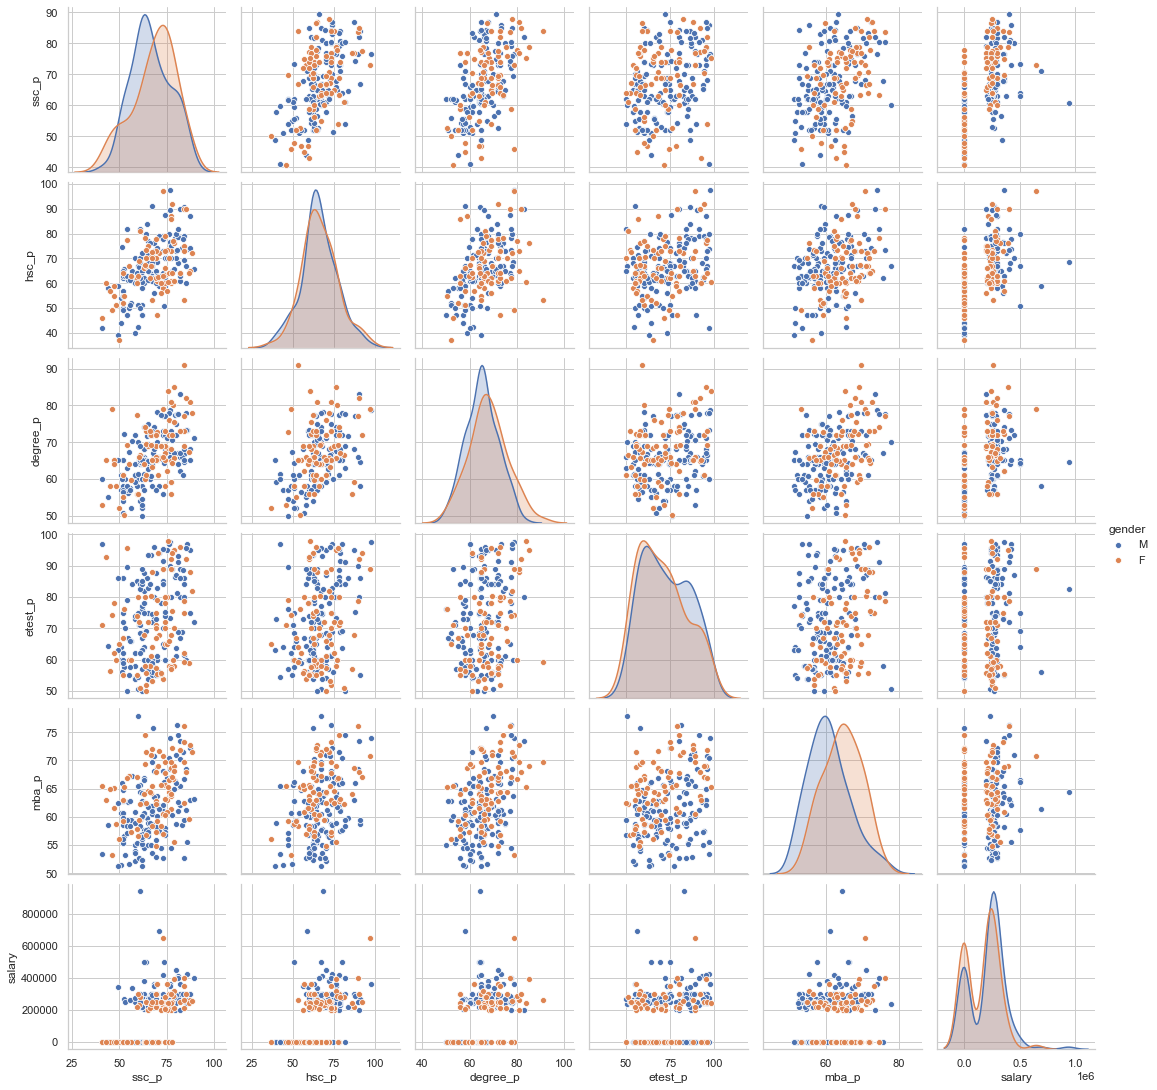

In [46]:
sns.pairplot(df, hue = 'gender')

#### Distribution plot
Plot of salary distribution

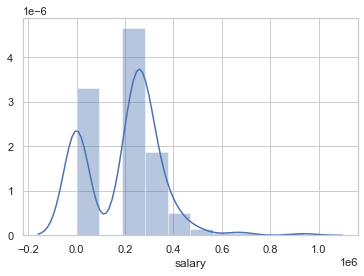

In [47]:
sns.distplot(df['salary'], bins=10, kde=True)

#### Pie-chart
Pie-chart displaying degree title and mean degree percent for that title.

In [48]:
fig = px.pie(df.groupby(["degree_t"])[["degree_p"]].mean().reset_index(),
             values="degree_p",
             names="degree_t",
             template="seaborn",
             width = 600,
             height = 600)
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

#### Categorical plots

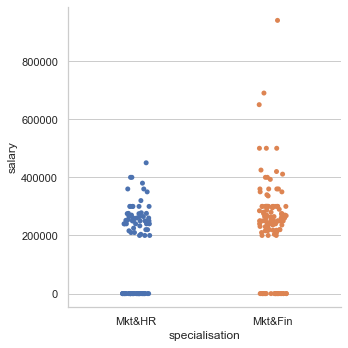

In [49]:
sns.catplot(x = "specialisation", y = "salary", data = df);

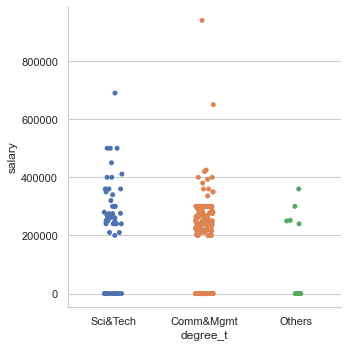

In [50]:
sns.catplot(x = "degree_t", y = "salary", data = df);

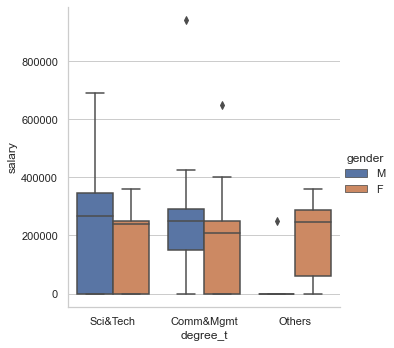

In [51]:
sns.catplot(x = "degree_t", y = "salary", hue = "gender", kind = "box", data = df);

## Preparing data for model

In [52]:
df = df.drop('salary', axis = 1)

In [53]:
label_dict = {'Placed':1, 'Not Placed':0}
df['status'] = df['status'].map(label_dict)

board_dict = {'Others':0, 'Central':1}
df['ssc_b'] = df['ssc_b'].map(board_dict)
df['hsc_b'] = df['hsc_b'].map(board_dict)

workex_dict = {'Yes':1, 'No':0}
df['workex'] = df['workex'].map(workex_dict)

title_dummies = pd.get_dummies(df['degree_t'])
df = pd.concat([df.drop('degree_t',axis=1),title_dummies],axis=1)

specialised_dummies = pd.get_dummies(df['specialisation'])
df = pd.concat([df.drop('specialisation',axis=1),specialised_dummies],axis=1) 

gender_dummies = pd.get_dummies(df['gender'])
df = pd.concat([df.drop('gender',axis=1),gender_dummies],axis=1)

stream_dummies = pd.get_dummies(df['hsc_s'])
df = pd.concat([df.drop('hsc_s',axis=1),stream_dummies],axis=1)

In [54]:
df.head()

ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  mba_p  status  \
0  67.00      0  91.00      0     58.00       0     55.0  58.80       1   
1  79.33      1  78.33      0     77.48       1     86.5  66.28       1   
2  65.00      1  68.00      1     64.00       0     75.0  57.80       1   
3  56.00      1  52.00      1     52.00       0     66.0  59.43       0   
4  85.80      1  73.60      1     73.30       0     96.8  55.50       1   

   Comm&Mgmt  Others  Sci&Tech  Mkt&Fin  Mkt&HR  F  M  Arts  Commerce  Science  
0          0       0         1        0       1  0  1     0         1        0  
1          0       0         1        1       0  0  1     0         0        1  
2          1       0         0        1       0  0  1     1         0        0  
3          0       0         1        0       1  0  1     0         0        1  
4          1       0         0        1       0  0  1     0         1        0

In [55]:
X = df.drop('status',axis=1).values
y = df['status'].values

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=101)

In [57]:
print('Shape of X_train :',X_train.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of X_val :',X_val.shape)
print('Shape of y_val :',y_val.shape)

Shape of X_train : (172, 18)
Shape of y_train : (172,)
Shape of X_val : (43, 18)
Shape of y_val : (43,)


## Building Model

In [58]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [59]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, \
                                 scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100,\
                           cv_results.std()*100)
    print(msg)

LR: 86.067227 (6.125215)


C:\Users\shana\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\shana\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Use

LDA: 88.336134 (2.743874)
KNN: 81.983193 (6.782632)
CART: 79.075630 (11.558334)
NB: 79.579832 (5.758602)
SVM: 79.075630 (6.780008)


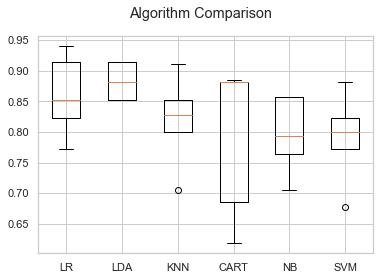

In [60]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Evaluating the model

In [61]:
model_new = LinearDiscriminantAnalysis()
model_new.fit(X_train, y_train)
predictions_on_val = model_new.predict(X_val)
print('Accuracy :',accuracy_score(y_val, predictions_on_val))
print(confusion_matrix(y_val,predictions_on_val))
print(classification_report(y_val, predictions_on_val))

Accuracy : 0.8837209302325582
[[14  2]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.92      0.89      0.91        27

    accuracy                           0.88        43
   macro avg       0.87      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43

